In [1]:
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import tensorflow as tk
from keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tqdm import tqdm

In [5]:
DATA_PATH = os.path.join('new_keypoints') 

parent_folder = 'videos'

# Get all folder names in the parent folder
# actions = np.array([name for name in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, name))])
actions = np.array([name for name in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, name))])

print(actions)

['fine' 'finish' 'go_to' 'how' 'i' 'i_love_you' 'learn' 'more'
 'nice_to_meet_you' 'please' 'see_you_later' 'thanks' 'want' 'yes']


In [6]:
actions.shape[0]

14

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'fine': 0}

In [5]:
sequences, labels = [], []
for action in tqdm(actions):
    videos = (os.listdir(os.path.join(parent_folder, action)))
    no_of_videos = len(os.listdir(os.path.join(parent_folder, action)))
    # Loop through sequences aka videos
    for s_video in range(no_of_videos):
        window = []
        for frame_num in range(50):
            res = np.load(os.path.join(DATA_PATH, action, str(s_video), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:43<00:00, 103.06s/it]


In [6]:
X = np.array(sequences)

In [27]:
y = to_categorical(labels, num_classes=14).astype(int)

In [28]:
y

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0,

In [29]:
X.shape

(50, 50, 258)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import keras

In [32]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [33]:
model = keras.models.load_model('models/testboy.keras')

In [67]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(50, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100


2/2 [==============================] - 19s 314ms/step - loss: 3.7147 - categorical_accuracy: 0.1333
Epoch 2/100
2/2 [==============================] - 1s 236ms/step - loss: 0.9707 - categorical_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 230ms/step - loss: 0.1524 - categorical_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 319ms/step - loss: 0.0177 - categorical_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 1s 230ms/step - loss: 0.0358 - categorical_accuracy: 0.9778
Epoch 6/100
2/2 [==============================] - 0s 233ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 223ms/step - loss: 5.3534e-04 - categorical_accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 222ms/step - loss: 2.8702e-04 - categorical_accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 219ms/step - loss: 1.7543e-04 - categorical_acc

KeyboardInterrupt: 

In [36]:
res = model.predict(X_test)
print(len(X_test))

1/1 [==============================] - 2s 2s/step
5


In [37]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
new_res = actions[np.argmax(res, axis=1)]

In [39]:
old_res = actions[np.argmax(y_test, axis=1)]

In [40]:
cm = confusion_matrix(old_res, new_res)

c:\py_me\venv\lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


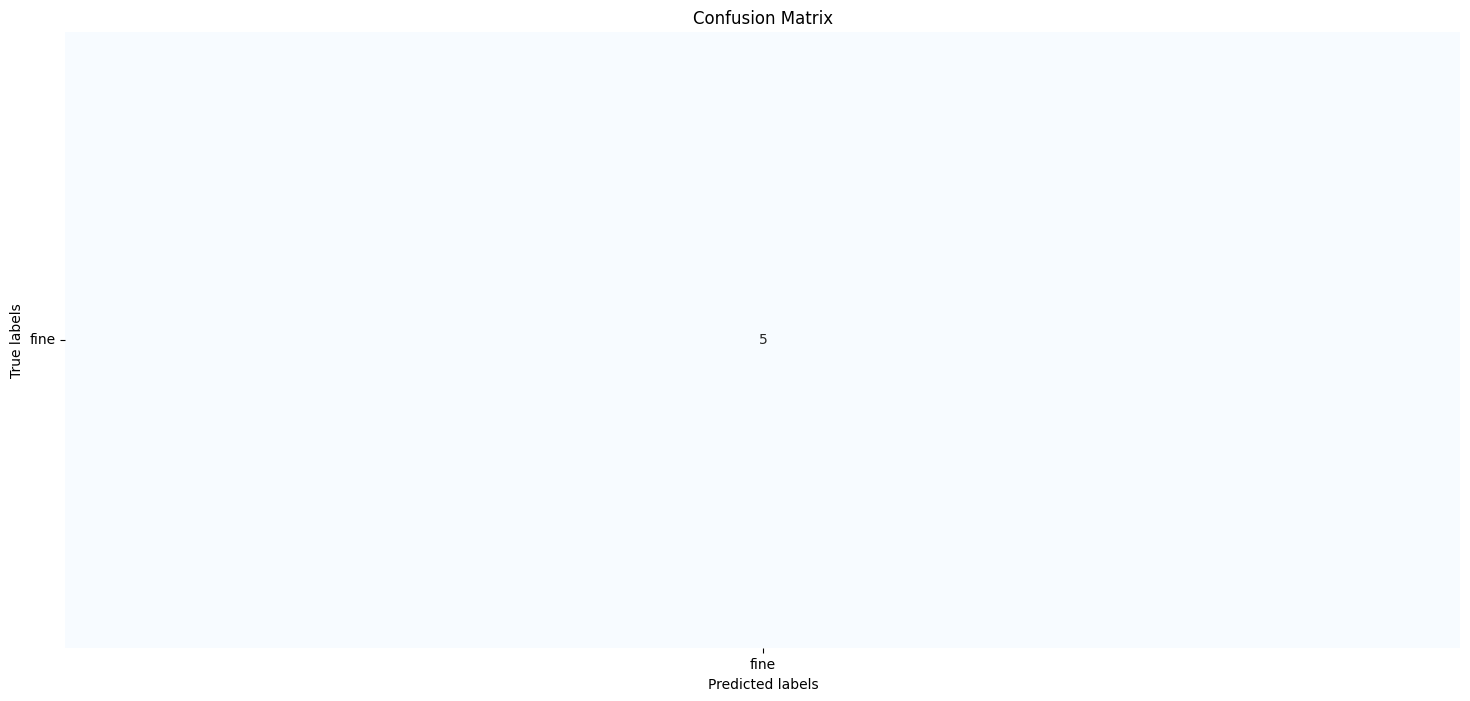

In [41]:
plt.figure(figsize=(18, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(set(old_res))) + 0.5, labels=set(old_res))
plt.yticks(np.arange(len(set(old_res))) + 0.5, labels=set(old_res), rotation=0)

# Display the plot
plt.show()

In [42]:
model.save('models/tesstboy.keras')

In [43]:
del(model)